
# MACHINE LEARNING

Machine Learning (ML), ou em protuguês "aprendizado de máquina", é uma área da inteligência artificial que ensina computadores a aprenderem com dados, sem serem programados diretamente para cada tarefa. Os tipos principais de aprendizado de máquina são:

#### 📚 Aprendizado Supervisionado
Treina o modelo com dados de entrada e as respostas corretas (rótulos), e os problemas comuns são a classificação e a regressão. Exemplos de modelos:
Exemplos de Modelos:

**Regressão Linear** - Prever um valor numérico.

**Regressão Logística** - Classificar em categorias (binárias normalmente: sim/não, 0/1).

**Árvore de Decisão** - Modelo que toma decisões baseadas em perguntas tipo "sim/não".

**Random Forest** - Várias árvores de decisão juntas para melhorar a precisão.

**Support Vector Machine (SVM)** - Tenta separar classes traçando uma linha (ou hiperplano) entre elas.

**Redes Neurais** - Inspirado no cérebro humano.

#### 🧩Aprendizado Não Supervisionado
O modelo tenta descobrir padrões escondidos. Exemplo: segmentar clientes de uma loja em grupos de comportamento semelhante.

**K-Means** - Agrupar dados em "K" grupos parecidos (clustering).

**Hierarchical Clustering** - Agrupar dados em uma estrutura de árvore (dendrograma).

**DBSCAN** - Agrupamento que detecta grupos de qualquer formato (não só redondinhos como o K-Means).

**PCA (Principal Component Analysis)** - Reduz a dimensionalidade dos dados (tipo comprimir informação).

**Autoencoders (Redes Neurais para compressão)** - Aprendem a representar dados de forma mais compacta.


O Python é uma linguagem de programação altamente utilizada para Machine Learning, as bibliotecas mais utilizadas são scikit-learn, pandas, numpy, matplotlib, seaborn. Sabendo disso, irei realizar uma análise de agrupamento (clustering) usando o dataset Iris, que contém informações de flores de três espécies diferentes (Setosa, Versicolor, Virginica), porém para o clustering, não será utilizado os rótulos! O modelo terá que descobrir os grupos sozinho baseado nas características das flores como comprimento e largura da sépala e da pétala.

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


/home/cateama/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


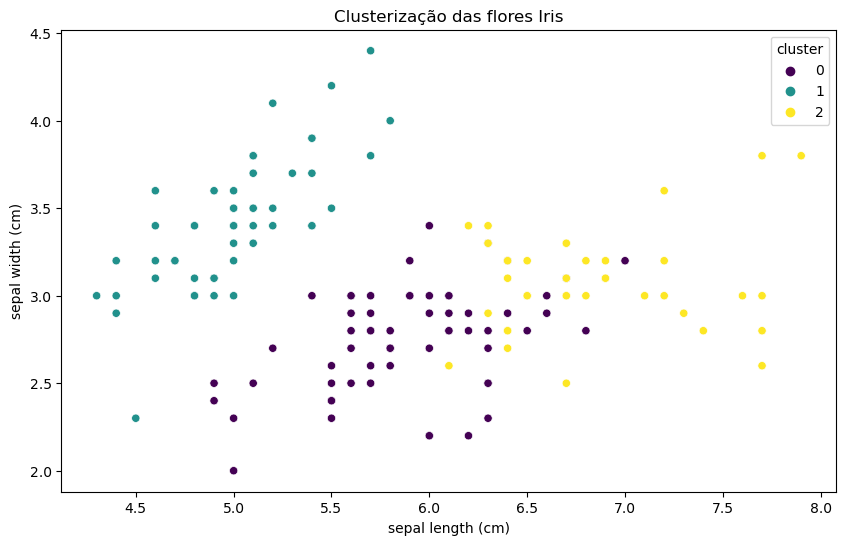

In [2]:
# 1. Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# 2. Carregar a base Iris
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# 3. Explorar os dados
print(X.head())

# 4. Aplicar K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# 5. Adicionar os clusters no DataFrame
X['cluster'] = kmeans.labels_

# 6. Visualizar os clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x=X['sepal length (cm)'], y=X['sepal width (cm)'], hue=X['cluster'], palette='viridis')
plt.title('Clusterização das flores Iris')
plt.show()

# 7. (Opcional) Comparar clusters com as espécies reais
real_labels = iris.target


O modelo K-Means realizou um agrupamento separando diferentes características das flores, no gráfico acima temos a comparação dos clusteres observandos em comparação com o comprimento e largura das sépalas, para que podermos ver visualmente o trabalho realizado pelo modelo. 

/home/cateama/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


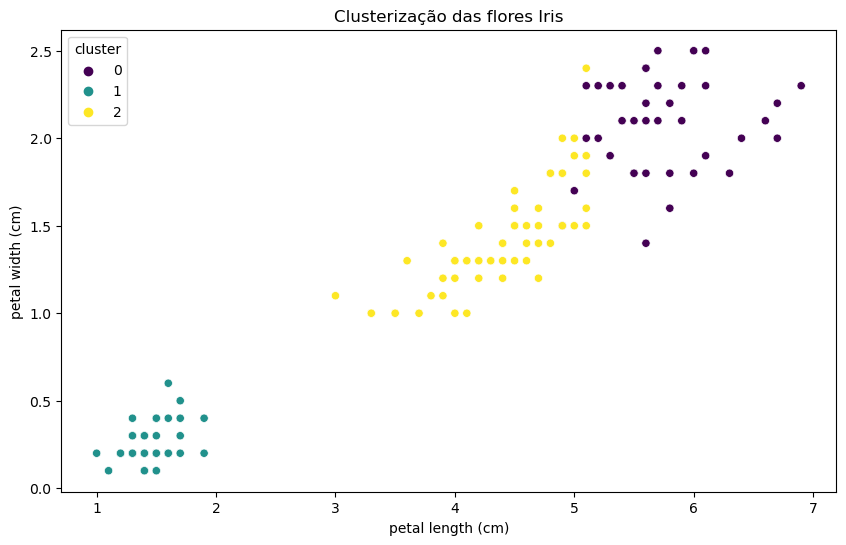

In [6]:
# 4. Aplicar K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# 5. Adicionar os clusters no DataFrame
X['cluster'] = kmeans.labels_

# 6. Visualizar os clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x=X['petal length (cm)'], y=X['petal width (cm)'], hue=X['cluster'], palette='viridis')
plt.title('Clusterização das flores Iris')
plt.show()


No gráfico acima temos a comparação dos clusteres observandos em comparação com o comprimento e largura das pétalas, para que podermos ver visualmente o trabalho realizado pelo modelo.

Abaixo, utilizei o modelo de PCA (Principal Component Analysis), esse modelo utiliza as variáveis originais (como sepal length, sepal width, etc.) e comprime a informação mais importante delas em novas variáveis chamadas de componentes principais. Escolhi utilizar dois componentes principais pois a junção dos dois capturam o máximo de variação possível dos dados.



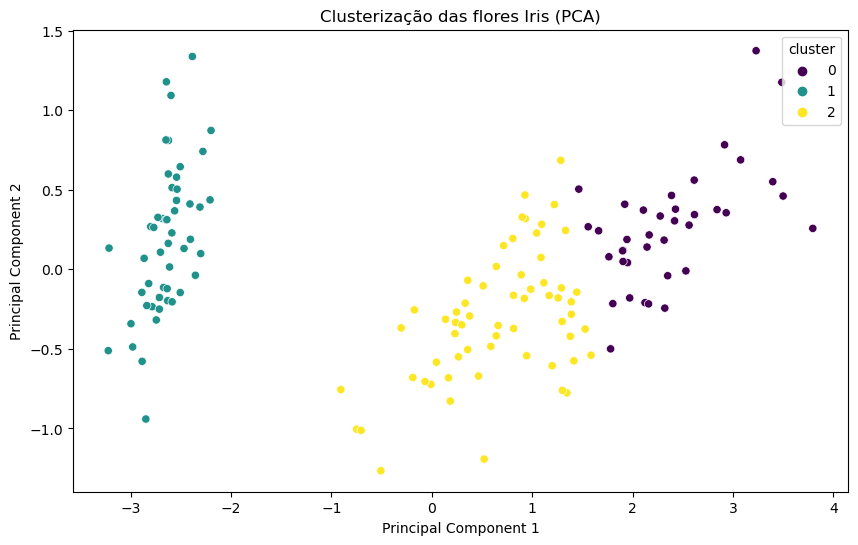

In [5]:
# 1. Importar a classe PCA
from sklearn.decomposition import PCA

# 2. Aplicar PCA para reduzir para 2 componentes
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X.drop(['cluster'], axis=1))
# Dropa a coluna 'cluster' que adicionamos antes

# 3. Transformar em DataFrame
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['cluster'] = X['cluster']

# 4. Visualizar os dados em 2D
plt.figure(figsize=(10,6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_df, palette='viridis')
plt.title('Clusterização das flores Iris (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Nos gráficos anteriores foi analisado os cluster somente utilizando as dados fornecidos das características das flores, mas após rodar uma PCA que calcula a matriz de covariância entre as variáveis, sendo que o PC1 (primeiro componente) capta a maior quantidade possível de variação dos dados e o (PC2) capta o que sobrou da variação, mas em uma direção perpendicular ao PC1. Pode-se concluir que as Setosas é o grupo 1 em verde, Versicolor é o grupo 2 em amarelo, e Virginica é o grupo 0 em azul. 